## Banco de dados DATASET11 - Bearing Classification

### Importação de Bibliotecas

In [3]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import iirnotch
import scipy.io

### Carregamento de arquivos

In [4]:

letters = ['H', 'I', 'O'] # 0-healthy, I-inner fault, O-outer fault
# letters = ['H']
speeds = ['A', 'B', 'C', 'D']
# speeds = ['A']
trials = ['1','2', '3']
# trials = ['1']
state = 0
dataset = []
for letter in letters:
    for speed in speeds:
        for trial in trials:
            path_signal = f'../../Dados/Rotor_Bearing/Dataset11/Data/{letter}-{speed}-{trial}.mat'
            df_signal = scipy.io.loadmat(path_signal)
            channel_1 = df_signal['Channel_1'].flatten()
            # channel_2 = df_signal['Channel_2'].flatten()
            signal = []
            signal.append([channel_1, state])
            dataset.append(signal)
    state +=1

### Tratamento dos dados em vetores de entrada

In [5]:
data = []
X=[]
y=[]
for i in dataset:
    data.append(i[0])

for i in data:
    X.append(i[0])
    y.append(i[1])

### Aplicação de técnicas de processamento de sinais - Cálculos estatísticos

--------------------------------------------------------

#### Time-Domain Features

##### Skewness

In [6]:
from scipy.stats import skew

def get_skewness(signal):
    return skew(signal)

##### Kurtosis

In [7]:
from scipy.stats import kurtosis

def get_kurtosis(signal):
    return kurtosis(signal)

##### Shape Factor

In [8]:
def get_shape_factor(signal):
    N = len(signal)
    return np.sqrt(((signal**2).sum()/N) / ((abs(signal)).sum()/N))

##### Variation

In [9]:
import statistics

def get_variance(signal):
    return statistics.variance(signal)

##### Standard Deviation

In [10]:
def get_std(signal):
    return statistics.stdev(signal)

##### RMS

In [11]:
def get_rms_acceleration(signal):
    N = len(signal)
    return np.sqrt(1/N * (signal**2).sum())

##### Peak-to-Peak

In [12]:
def get_peak_acceleration(signal):
    return max(abs(signal))

##### Crest Factor

In [13]:
def get_crest_factor(signal):
    return get_peak_acceleration(signal)/get_rms_acceleration(signal)

-----------------------------------------------------------------------------------

#### Frequency-Domain Features

In [14]:
def get_frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))
def get_mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))
def get_root_mean_square_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal))
def get_root_variance_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal) - get_frequency_centre(signal)**2)

------------------------------------------------------------------------------------

#### Time-Frequency Domain

##### Estimate power spectral density using Welch’s method.


##### Power Spectral Density (PSD)

##### Função de Densidade de Probabilidade (PDF). - cálculo de skewness e kurtosis

---------------------------------------------------------------------------------------

In [15]:
features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration, 
                          get_peak_acceleration,
                          get_crest_factor, get_frequency_centre, get_mean_square_frequency, get_root_mean_square_frequency, 
                          get_root_variance_frequency]

list_features_function = features_function[0:3]

list_features_function

[<function __main__.get_skewness(signal)>,
 <function __main__.get_kurtosis(signal)>,
 <function __main__.get_shape_factor(signal)>]

In [17]:
experiments_ids = list(range(0,len(dataset)))

In [18]:
data_features = []
i = 0
for exp in experiments_ids:
    experiment = dataset[exp][0][0]
    feature_accelerometer = []

    for func in list_features_function:
        
        accelerometer = func(dataset[exp][0][0])

        if type(accelerometer) == list:
            feature_accelerometer+=accelerometer
            
        else:
            feature_accelerometer.append(accelerometer)

    
    data_features.append([feature_accelerometer, [dataset[exp][0][1]]])

In [19]:
features_list = list()

for i in data_features:
    y = np.concatenate([np.array(x) for x in i])
    features_list.append(y)

features_list = np.array(features_list)
len(features_list[:, 1])

36

### Aplicação de Técnicas de Inteligência Artificial

##### MLP

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [20]:
features_list

array([[-0.32475027,  2.38600824,  0.09610514,  0.        ],
       [-0.22270423,  1.97591857,  0.10375178,  0.        ],
       [-0.24821756,  1.90705644,  0.10232843,  0.        ],
       [-0.21434363,  1.81587095,  0.1060322 ,  0.        ],
       [-0.35089627,  3.11674075,  0.09865319,  0.        ],
       [-0.1675782 ,  1.76874976,  0.10795986,  0.        ],
       [-0.24321569,  1.85683692,  0.10375844,  0.        ],
       [-0.29164404,  2.16175847,  0.10077444,  0.        ],
       [-0.26069383,  1.96637944,  0.10102784,  0.        ],
       [-0.34223142,  2.57709578,  0.09832305,  0.        ],
       [-0.35048064,  2.68920142,  0.09783274,  0.        ],
       [-0.03419698,  1.54215821,  0.12431563,  0.        ],
       [-0.81296965, 11.67626118,  0.46821392,  1.        ],
       [-0.18811017, 20.26228654,  0.28124766,  1.        ],
       [-0.05763012, 16.90026217,  0.28128291,  1.        ],
       [-0.14315521, 24.94852721,  0.25537852,  1.        ],
       [-0.12711404, 20.


Validation Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
[2. 1. 2. 2. 1. 2. 1. 0. 0. 1. 0.]

Validation Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
[2. 1. 2. 2. 1.

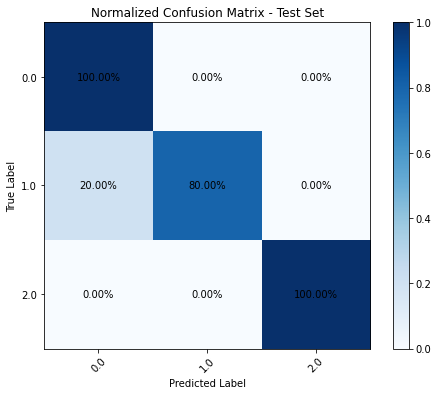

In [25]:
X = features_list[:,0:3]
y = features_list[:,-1]

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 30, 30, 10), max_iter=10000, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation results
test_accuracies = []
test_classification_reps = []
conf_matrices = []
roc_aucs = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Fit the classifier to the training data
    mlp_classifier.fit(X_train_fold, y_train_fold)

    # Make predictions on the testing data
    y_val_pred_fold = mlp_classifier.predict(X_val_fold)

    # Evaluate the model on the validation set
    val_accuracy_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    val_classification_rep_fold = classification_report(y_val_fold, y_val_pred_fold)

    print("\nValidation Results:")
    print(f"Accuracy: {val_accuracy_fold}")
    print("Classification Report:\n", val_classification_rep_fold)

    # Make predictions on the testing data
    y_test_pred_fold = mlp_classifier.predict(X_test)

    # print(X_test)
    print(y_test)
    print(y_test_pred_fold)

    # Evaluate the model on the testing set
    test_accuracy_fold = accuracy_score(y_test, y_test_pred_fold)
    test_classification_rep_fold = classification_report(y_test, y_test_pred_fold)
    test_accuracies.append(test_accuracy_fold)
    test_classification_reps.append(test_classification_rep_fold)

    # Plot Confusion Matrix for Validation Set
    conf_matrix_test_fold = confusion_matrix(y_test, y_test_pred_fold)
    conf_matrices.append(conf_matrix_test_fold)

    # Convert labels to binary format for the ROC curve
    y_test_bin_fold = label_binarize(y_test, classes=np.unique(y))

    # Create a OneVsRestClassifier for ROC curve
    classifier_ovr_fold = OneVsRestClassifier(mlp_classifier)
    y_test_score_fold = classifier_ovr_fold.fit(X_train_fold, y_train_fold).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr_fold = dict()
    tpr_fold = dict()
    roc_auc_fold = dict()

    for i in range(len(np.unique(y))):
        fpr_fold[i], tpr_fold[i], _ = roc_curve(y_test_bin_fold[:, i], y_test_score_fold[:, i])
        roc_auc_fold[i] = auc(fpr_fold[i], tpr_fold[i])

    roc_aucs.append(roc_auc_fold)

# Print the average test results over all folds
print("\nAverage Test Results Across Folds:")
print(f"Accuracy: {np.mean(test_accuracies)}")

# Plot normalized Confusion Matrix for Validation Set
conf_matrix_avg = np.mean(conf_matrices, axis=0)
conf_matrix_test_normalized = conf_matrix_avg / conf_matrix_avg.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Normalized Confusion Matrix - Test Set')
plt.colorbar()

classes = list(set(y))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix_test_normalized[i, j]*100:.2f}%", ha='center', va='center')

plt.show()

##### SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
Accuracy on the test set: 100.00%
Cross-Validation Accuracy Scores: [0.8 1.  1.  1.  1. ]
Average Cross-Validation Accuracy: 96.00%


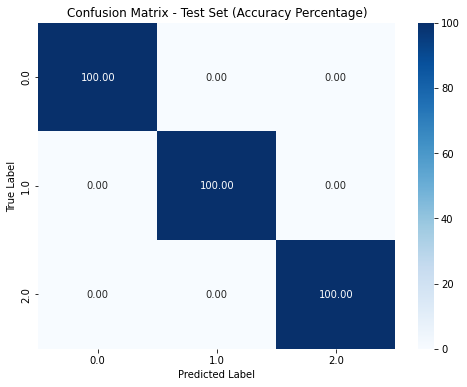

In [25]:
X = features_list[:,0:2]
y = features_list[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear', max_iter=10000)

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Train the model on the entire training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

print(y_test)
print(y_pred)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Plot the confusion matrix with accuracy percentages and colorbar
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Test Set (Accuracy Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()